In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Ecommerce_Sales_Data_2024_2025.csv')
data.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Region', 'City', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Unit Price', 'Discount',
       'Sales', 'Profit', 'Payment Mode'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [4]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [15]:
data.describe()

,Order ID,Order Date,Quantity,Unit Price,Discount,Sales,Profit
count,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12500.500000,2024-09-30 18:58:27.840000,2.992600,39760.904600,10.051000,106733.204870,15941.746982
min,10001.000000,2023-10-04 00:00:00,1.000000,222.000000,0.000000,264.100000,19.120000
25%,11250.750000,2024-04-05 00:00:00,2.000000,20312.250000,5.000000,39766.537500,4892.295000
50%,12500.500000,2024-09-29 00:00:00,3.000000,39459.500000,10.000000,83080.325000,11108.525000
75%,13750.250000,2025-03-30 00:00:00,4.000000,59721.750000,15.000000,156968.587500,22467.987500
max,15000.000000,2025-10-03 00:00:00,5.000000,79998.000000,20.000000,398485.000000,89688.440000
std,1443.520003,NaN,1.413133,22831.783946,7.084662,85108.208202,14897.684916


In [6]:
print(data['Region'].value_counts())

Region
North    1288
East     1256
West     1241
South    1215
Name: count, dtype: int64


In [7]:
print(data['Payment Mode'].value_counts())

Payment Mode
Net Banking    1010
COD            1005
Debit Card     1003
Credit Card     994
UPI             988
Name: count, dtype: int64


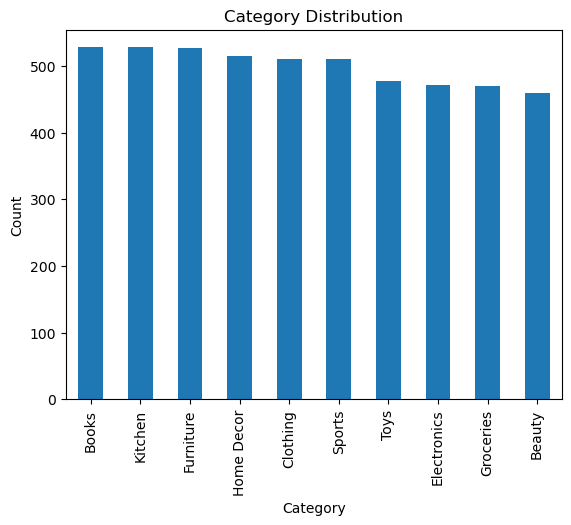

In [8]:
plt.figure()
data['Category'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


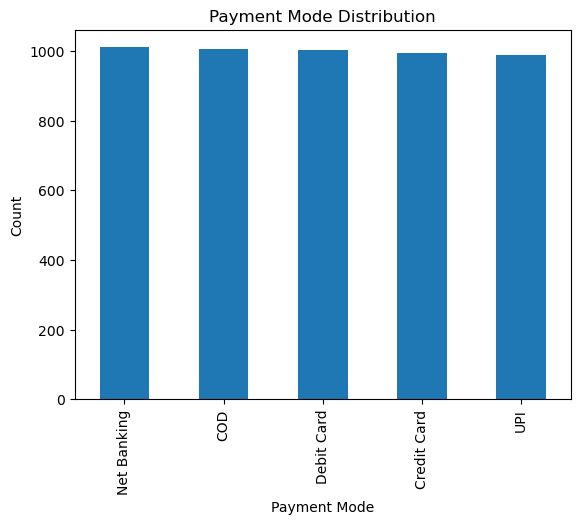

In [9]:
plt.figure()
data['Payment Mode'].value_counts().plot(kind='bar')
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.show()

In [10]:
data['Order Date'].dt.year.value_counts().sort_index()

Order Date
2023     601
2024    2532
2025    1867
Name: count, dtype: int64

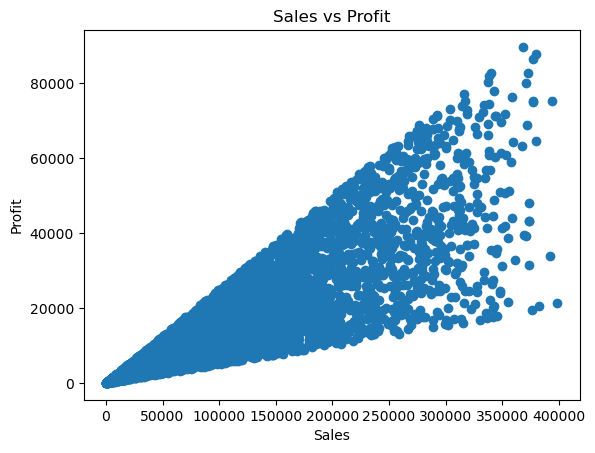

In [11]:
plt.figure()
plt.scatter(data['Sales'], data['Profit'])
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

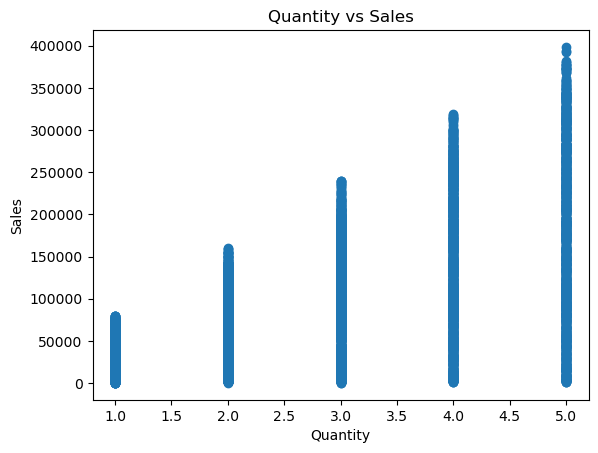

In [12]:
plt.figure()
plt.scatter(data['Quantity'], data['Sales'])
plt.title('Quantity vs Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

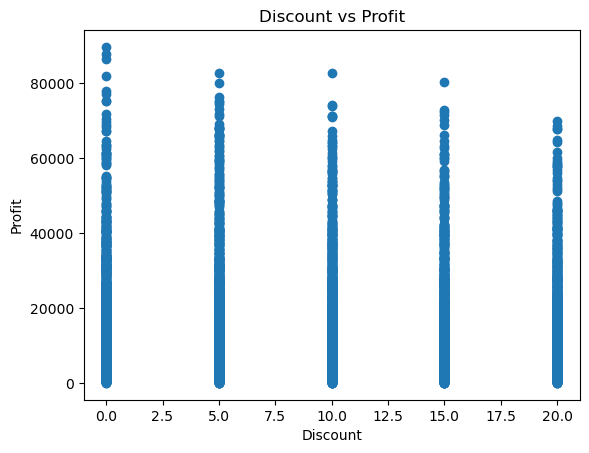

In [13]:
plt.figure()
plt.scatter(data['Discount'], data['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

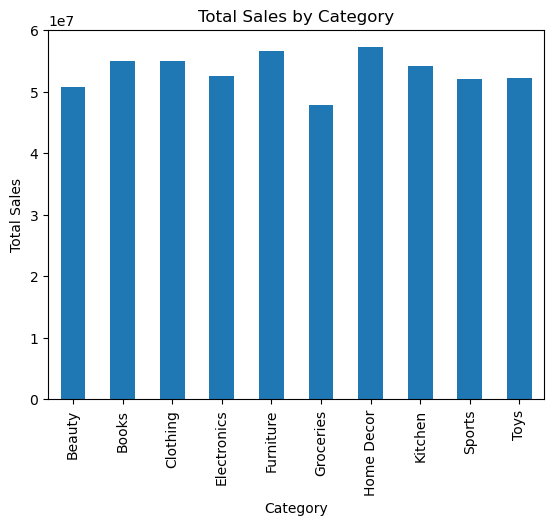

In [14]:
plt.figure()
data.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

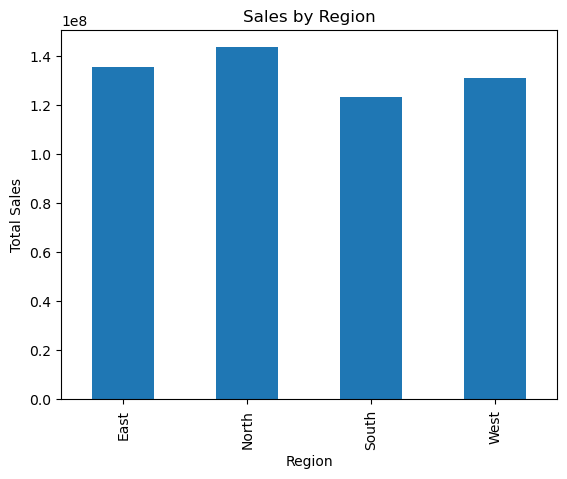

In [15]:
plt.figure()
data.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

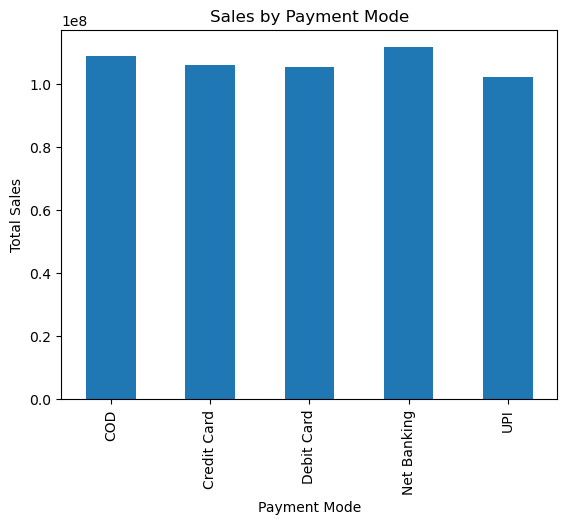

In [16]:
plt.figure()
data.groupby('Payment Mode')['Sales'].sum().plot(kind='bar')
plt.title('Sales by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Sales')
plt.show()

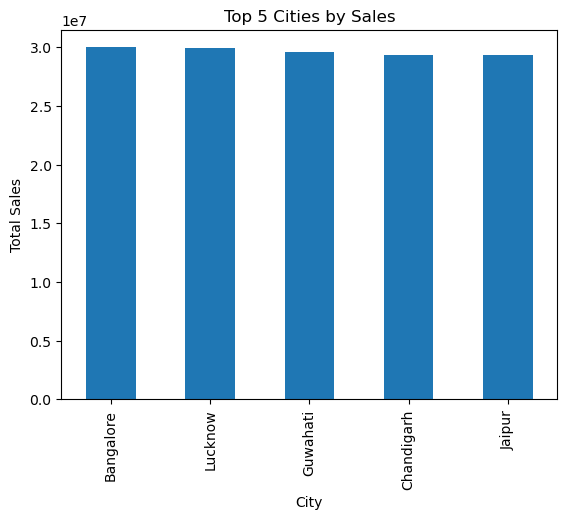

In [17]:
top_cities = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure()
top_cities.plot(kind='bar')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

In [18]:
corr = data[['Quantity', 'Unit Price', 'Discount', 'Sales', 'Profit']].corr()
corr

,Quantity,Unit Price,Discount,Sales,Profit
Quantity,1.000000,-0.010982,-0.007955,0.588705,0.502701
Unit Price,-0.010982,1.000000,0.000475,0.715123,0.606293
Discount,-0.007955,0.000475,1.000000,-0.101611,-0.088516
Sales,0.588705,0.715123,-0.101611,1.000000,0.848792
Profit,0.502701,0.606293,-0.088516,0.848792,1.000000


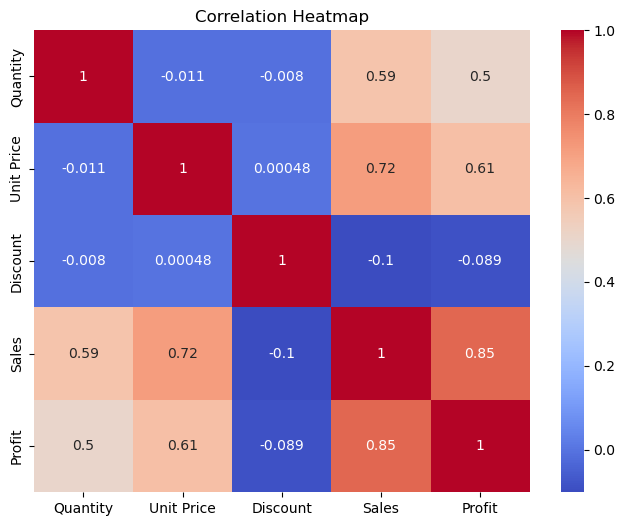

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
category_summary = data.groupby('Category')[['Sales', 'Profit']].sum()
category_summary

,Sales,Profit
Category,,
Beauty,50803409.70,7213436.07
Books,54932643.00,8076273.29
Clothing,55053908.30,8445750.29
Electronics,52587883.95,8042133.88
Furniture,56647187.90,8693087.03
Groceries,47883103.15,7075332.64
Home Decor,57233222.35,8556846.94
Kitchen,54227902.30,7879573.29
Sports,52069397.25,7739430.04


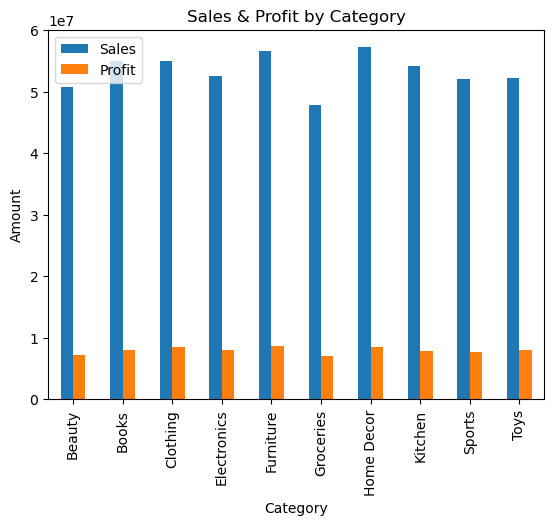

In [21]:
category_summary.plot(kind='bar')
plt.title('Sales & Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

In [25]:
data['Year'] = data['Order Date'].dt.year

year_category_sales = data.groupby(['Year', 'Category'])['Sales'].sum()

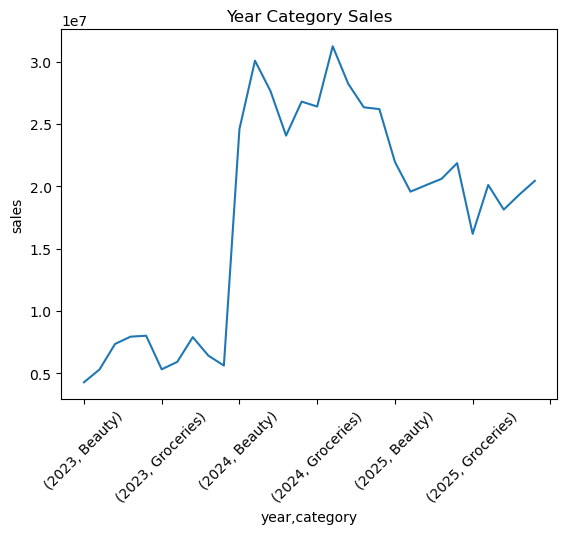

In [26]:
year_category_sales.plot(kind='line')
plt.xlabel('year,category')
plt.ylabel('sales')
plt.title('Year Category Sales')
plt.xticks(rotation=45)
plt.show()